In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%pushd "/content/drive/MyDrive/MSSP6070/Assignments"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MSSP6070/Assignments


['/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%pushd '/content/drive/MyDrive/MSSP607/Assignments/Case Study Report Assignment 3'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/MSSP607/Assignments/Case Study Report Assignment 3'
/content/drive/MyDrive/MSSP6070/Assignments


['/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content/drive/My Drive/MSSP6070/Assignments',
 '/content']

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm,skew



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSSP6070/Assignments/HousingPrices.csv')

In [ ]:
df.head()

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
0,1,65.0,8450.0,2Story,7,5,2003,856.0,Y,856,854,2,8,2,548,2008,208500
1,2,80.0,9600.0,1Story,6,8,1976,NaN,Y,1262,0,2,6,2,460,2007,181500
2,3,68.0,11250.0,2Story,7,5,2001,920.0,Y,920,866,2,6,2,608,2008,223500
3,4,60.0,9550.0,2Story,7,5,1915,NaN,Y,961,756,1,7,3,642,2006,140000
4,5,84.0,14260.0,2Story,8,5,2000,1145.0,Y,1145,1053,2,9,3,836,2008,250000


In [ ]:
mean_price = df['SalePrice'].mean()
mean_price

180921.19589041095

In [ ]:
sd_price = df['SalePrice'].std()
sd_price

79442.50288288662

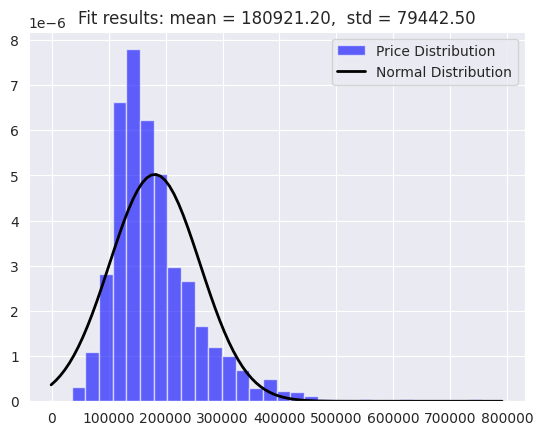

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes las variables mean_price y sd_price calculadas
# mean_price = df['SalePriceHouse'].mean()
# sd_price = df['SalePriceHouse'].std()

# Graficar el histograma de la variable 'SalePriceHouse'
plt.hist(df['SalePrice'], bins=30, density=True, alpha=0.6, color='b', label='Price Distribution')

# Calcular la función de densidad de probabilidad de la distribución normal
import numpy as np
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_price, sd_price)

# Graficar la línea de la media
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
title = "Fit results: mean = %.2f,  std = %.2f" % (mean_price, sd_price)
plt.title(title)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


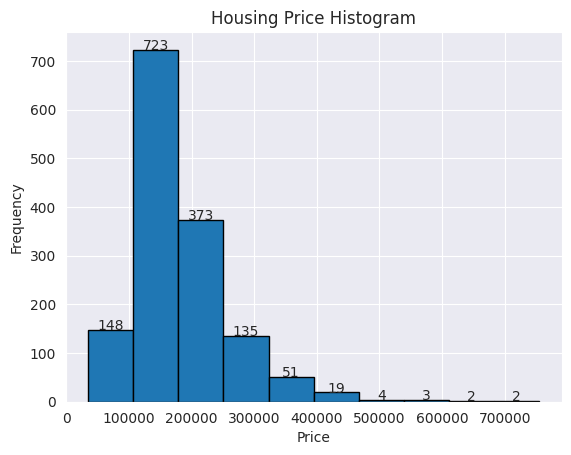

In [ ]:
num_bins = 10

n, bins, patches = plt.hist(df['SalePrice'], bins=num_bins, edgecolor='k')

plt.title('Housing Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             patches[i].get_height() + 0.1,
             f'{int(n[i])}',
             ha='center')

plt.show()

In [ ]:
top_11 = df.sort_values(by='SalePrice', ascending=False).head(11)
top_11

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
691,692,104.0,21535.0,2Story,10,6,1994,NaN,Y,2444,1872,3,10,3,832,2007,755000
1182,1183,160.0,15623.0,2Story,10,5,1996,NaN,Y,2411,2065,3,10,3,813,2007,745000
1169,1170,118.0,35760.0,2Story,10,5,1995,1930.0,Y,1831,1796,3,10,3,807,2006,625000
898,899,100.0,12919.0,1Story,9,5,2009,NaN,Y,2364,0,2,11,3,820,2010,611657
803,804,107.0,13891.0,2Story,9,5,2008,NaN,Y,1734,1088,3,12,3,1020,2009,582933
1046,1047,85.0,16056.0,2Story,9,5,2005,1992.0,Y,1992,876,3,11,3,716,2006,556581
440,441,105.0,15431.0,1Story,10,5,2008,NaN,Y,2402,0,2,10,3,672,2009,555000
769,770,47.0,53504.0,2Story,8,5,2003,1650.0,Y,1690,1589,3,12,3,841,2010,538000
178,179,63.0,17423.0,1Story,9,5,2008,NaN,Y,2234,0,2,9,3,1166,2009,501837
798,799,104.0,NaN,2Story,9,5,2008,1926.0,Y,1966,1174,3,11,3,820,2009,485000


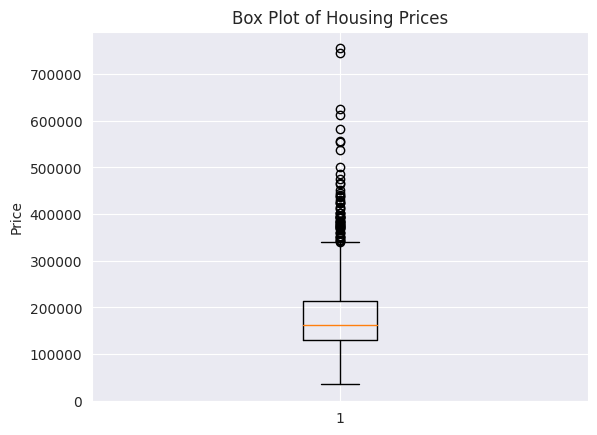

In [ ]:
plt.boxplot(df['SalePrice'])
plt.title('Box Plot of Housing Prices')
plt.ylabel('Price')
plt.show()

In [ ]:
z_scores = (df['SalePrice'] - df['SalePrice'].mean()) / df['SalePrice'].std()

outliers = df[abs(z_scores) > 3]

outliers

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
58,59,66.0,13682.0,2Story,10,5,2006,NaN,Y,1426,1519,3,10,3,641,2006,438780
178,179,63.0,17423.0,1Story,9,5,2008,NaN,Y,2234,0,2,9,3,1166,2009,501837
185,186,90.0,22950.0,2.5Fin,10,9,1892,1107.0,Y,1518,1518,2,12,3,840,2006,475000
349,350,56.0,20431.0,2Story,9,5,2005,NaN,Y,1848,880,2,10,3,706,2006,437154
389,390,96.0,12474.0,2Story,10,5,2007,NaN,Y,1742,590,2,9,3,846,2008,426000
440,441,105.0,15431.0,1Story,10,5,2008,NaN,Y,2402,0,2,10,3,672,2009,555000
473,474,110.0,14977.0,1Story,8,5,2006,NaN,Y,1976,0,2,7,3,908,2007,440000
496,497,NaN,12692.0,1Story,8,5,1992,3200.0,Y,3228,0,3,10,2,546,2007,430000
527,528,67.0,14948.0,2Story,9,5,2008,1452.0,Y,1476,1237,2,11,3,858,2008,446261
591,592,97.0,NaN,2Story,10,5,2008,NaN,Y,1728,568,2,10,3,842,2009,451950


In [ ]:
outliers.shape[0]

22

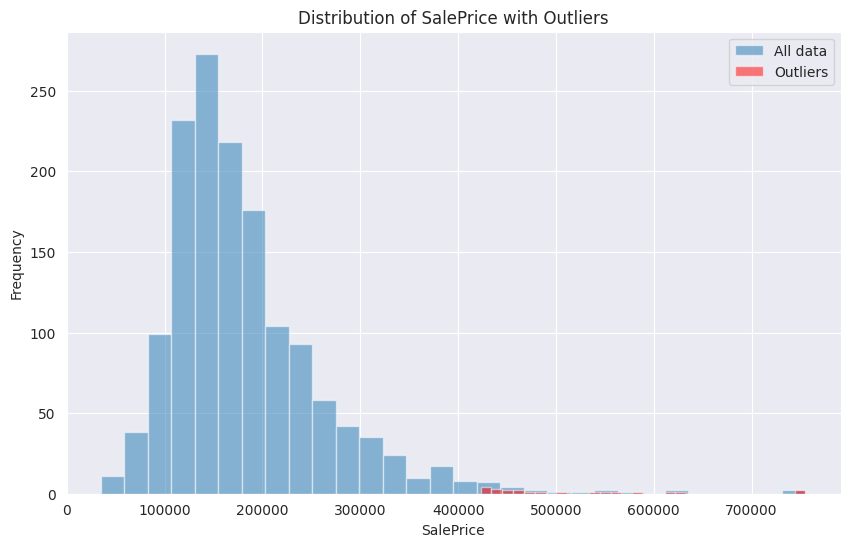

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, alpha=0.5, label='All data')
plt.hist(outliers['SalePrice'], bins=30, alpha=0.5, color='red', label='Outliers')

plt.title('Distribution of SalePrice with Outliers')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()


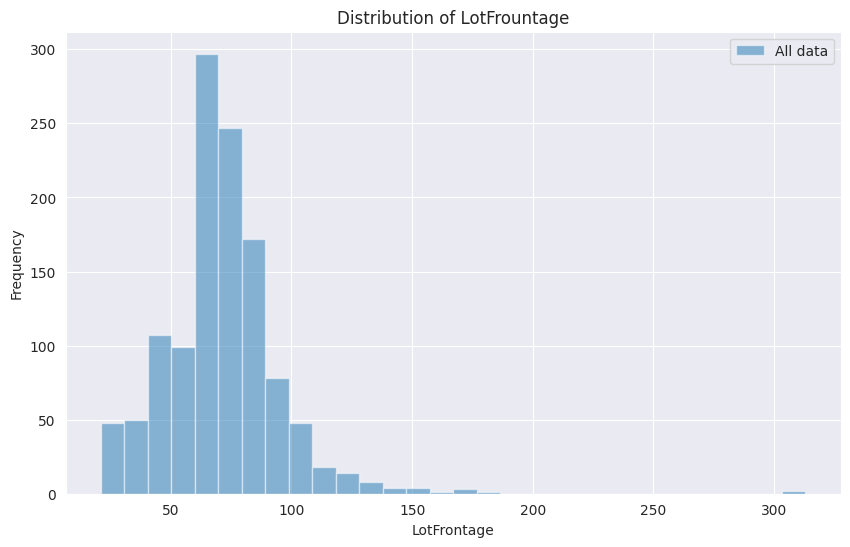

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['LotFrontage'], bins=30, alpha=0.5, label='All data')

plt.title('Distribution of LotFrountage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

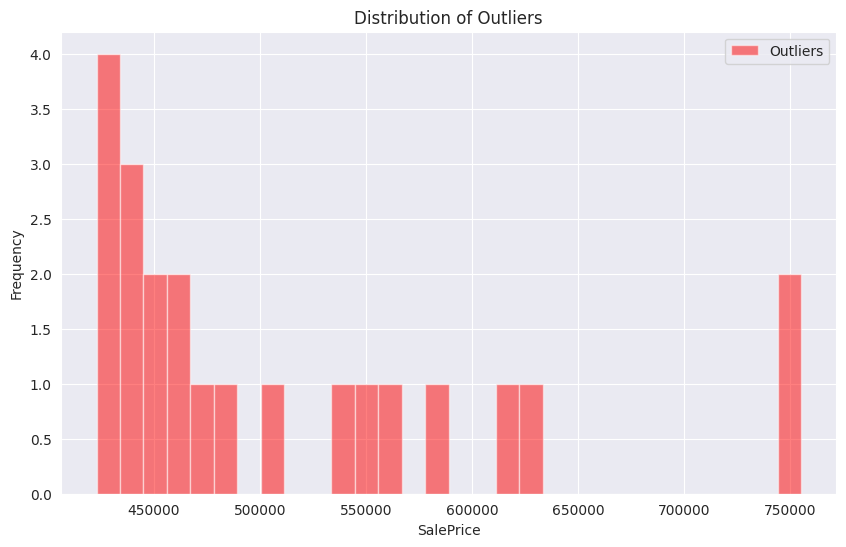

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(outliers['SalePrice'], bins=30, alpha=0.5, color='red', label='Outliers')

plt.title('Distribution of Outliers')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

clean the data: calculate the percentage of missing values for each feature and arrange them in descending order

In [ ]:
features_contain_null_values = []

In [ ]:
for features in df.columns:
  if df[features].isnull().sum() > 1:
    features_contain_null_values.append(features)

null_percentage = (df[features_contain_null_values].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
null_percentage

#LotArea: Lot size in square feet
#LotFrontage：Linear feet of street connected to property
#TotalBsmtSF：Total square feet of basement area

TotalBsmtSF    37.465753
LotFrontage    17.739726
LotArea         8.150685
dtype: float64

In [ ]:
#we guess the reason for the missing values may be due to some houses not having a basement.
#Since TotalBsmtSG is a continuous variable, I fill these missing values with zeros.

df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(0)

In [ ]:
#considering that all houses in this dataset are in the same neighborhood, and adjacent houses
#on the same street often share similar street frontage attributes, we fill the missing values with mode

df['LotFrontage']=df['LotFrontage'].fillna(df["LotFrontage"].mode())

calculate correlations between each variable in the dataset


<Axes: >

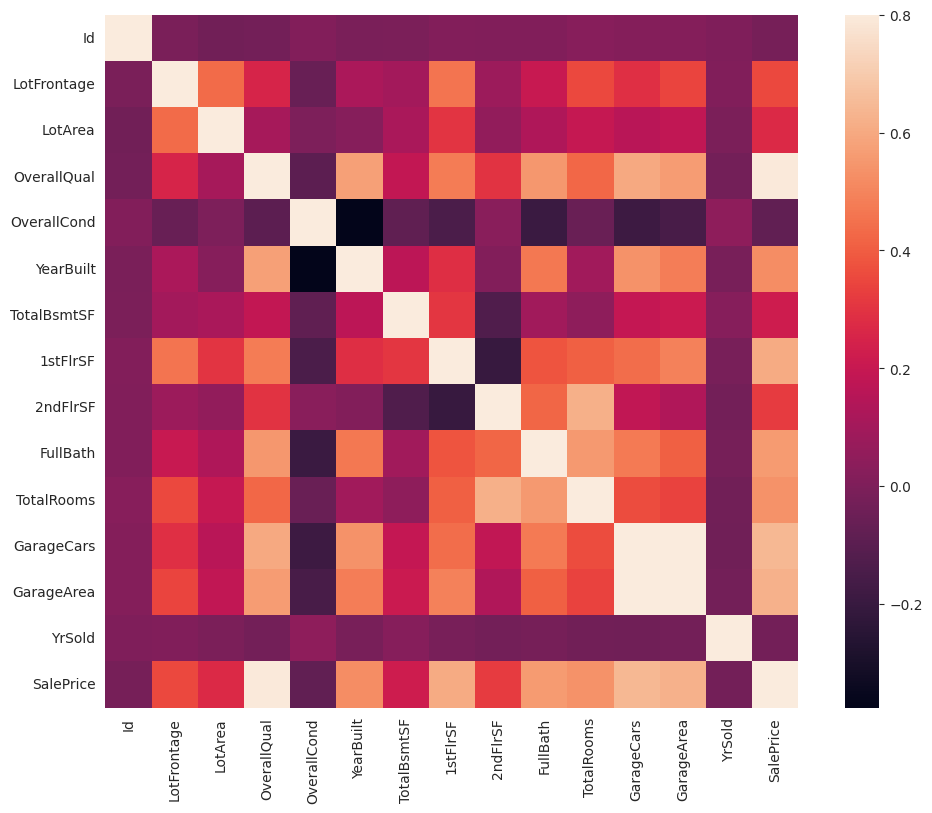

In [ ]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

Find the top 10 coefficients most correlated with sale prices

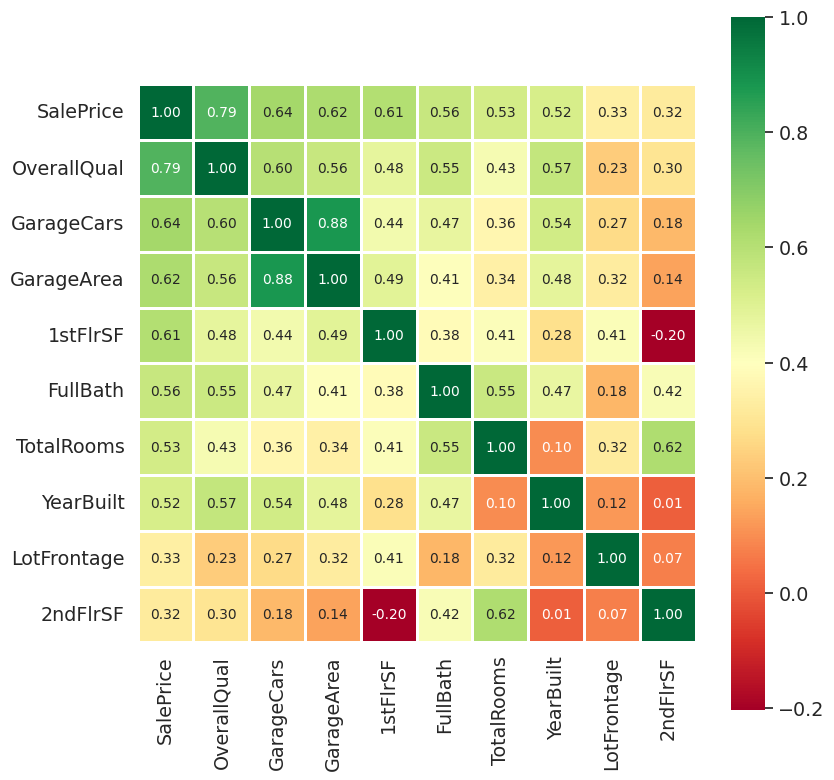

In [ ]:
k = 10
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(9,9))
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')    # if the value is bad the color would be lightblue instead of white
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',cmap=color,lw=1,annot_kws={'size':10},yticklabels=cols,xticklabels=cols)

#over all qual，TotalBsmtSF，Garage cars，garage area，1stFlrSF are strong correlated with salePrice（corr>0.6）
#Garage car and Garage Area are strong correlated, we will only include 1 in the model

Next we look at the relationships between overallqual，TotalBsmtSF，Garage area，1stFlrSF and sale price, and exclude the outliers. Here we use scatterplot for continuous variables, and box plot for categorical variable.


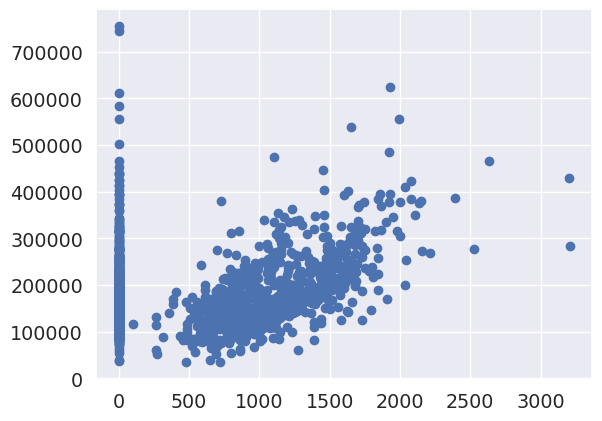

In [ ]:
fig,ax=plt.subplots()
plt.scatter(x=df['TotalBsmtSF'],y=df['SalePrice'])
#not bad

Text(0, 0.5, 'SalePrice')

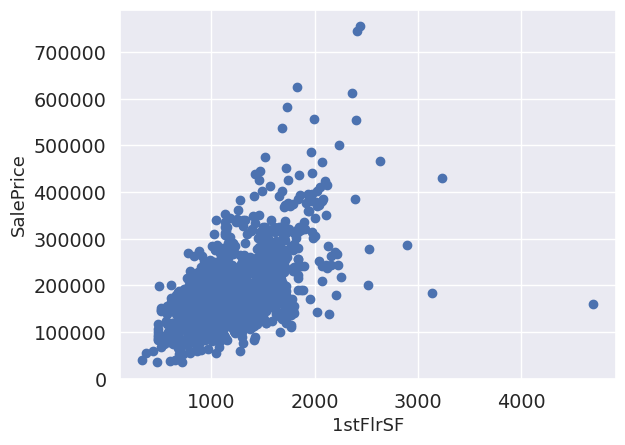

In [ ]:
fig,ax = plt.subplots()
plt.scatter(x=df['1stFlrSF'],y=df['SalePrice'])
plt.xlabel('1stFlrSF',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
#there is clearly a outlier at the right down coner. I will delete it in the next step.

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

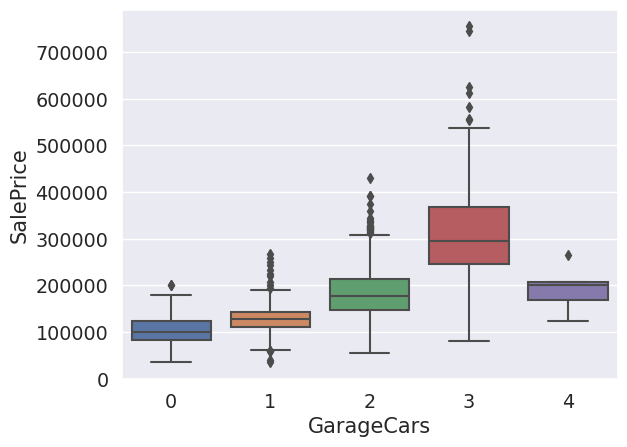

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(x=df['GarageCars'],y=df['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

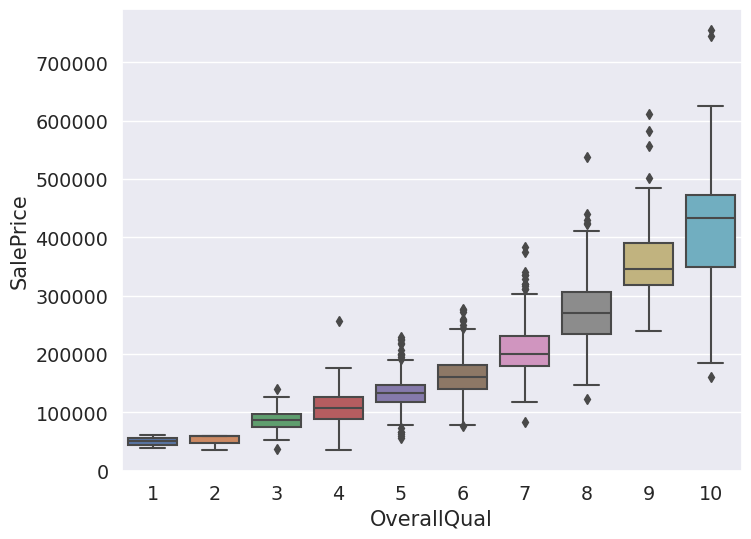

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['OverallQual'],y=df['SalePrice'])

mu=12.02 and sigma=0.4


Text(0.5, 1.0, 'SalePrice Distribution')

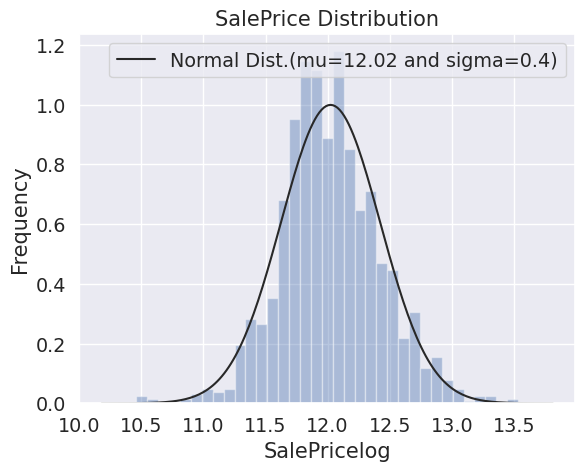

In [ ]:
#Since SalePrice is not normally distributed, I did a log transition for this variable
df1['SalePricelog']=np.log1p(df1['SalePrice'])

sns.distplot(df1['SalePricelog'],kde=False,fit=norm)
(mu,sigma)=norm.fit(df1['SalePricelog'])
print(f'mu={round(mu,2)} and sigma={round(sigma,2)}')
plt.legend([f'Normal Dist.(mu={round(mu,2)} and sigma={round(sigma,2)})' ],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

In [ ]:
#transform categorical variable into numerical variable
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

lb1=LabelEncoder()
lb1.fit(df1['OverallQual'].values)
df1['OverallQual']=lb1.transform(df1['OverallQual'].values)
df1.head()

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice,SalePricelog
0,1,65.0,8450.0,2Story,6,5,2003,856.0,Y,856,854,2,8,2,548,2008,208500,12.247699
1,2,80.0,9600.0,1Story,5,8,1976,0.0,Y,1262,0,2,6,2,460,2007,181500,12.109016
2,3,68.0,11250.0,2Story,6,5,2001,920.0,Y,920,866,2,6,2,608,2008,223500,12.317171
3,4,60.0,9550.0,2Story,6,5,1915,0.0,Y,961,756,1,7,3,642,2006,140000,11.849405
4,5,84.0,14260.0,2Story,7,5,2000,1145.0,Y,1145,1053,2,9,3,836,2008,250000,12.429220


**Remove Outliers**

Text(0.5, 0, '1stFlrSF')

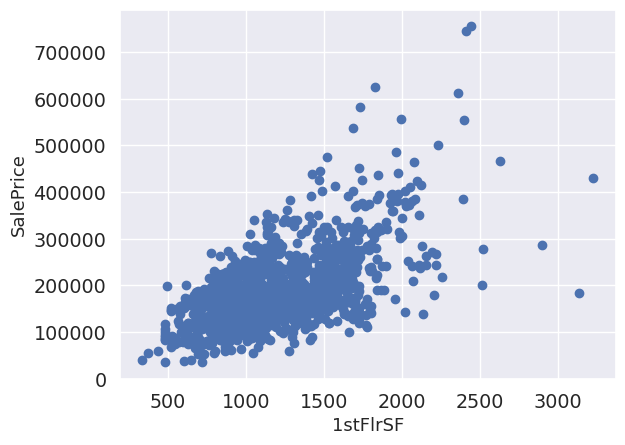

In [ ]:
df1 = df.drop(df[(df['1stFlrSF']>4000) & (df['SalePrice']<200000)].index)
plt.scatter(df1['1stFlrSF'], df1['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)

In [ ]:
common = df1.merge(outliers, on=['Id'], how='inner')
df_filtered = df1[(~df1['Id'].isin(common['Id']))]
df_filtered

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice,SalePricelog
0,1,65.0,8450.0,2Story,6,5,2003,856.0,Y,856,854,2,8,2,548,2008,208500,12.247699
1,2,80.0,9600.0,1Story,5,8,1976,0.0,Y,1262,0,2,6,2,460,2007,181500,12.109016
2,3,68.0,11250.0,2Story,6,5,2001,920.0,Y,920,866,2,6,2,608,2008,223500,12.317171
3,4,60.0,9550.0,2Story,6,5,1915,0.0,Y,961,756,1,7,3,642,2006,140000,11.849405
4,5,84.0,14260.0,2Story,7,5,2000,1145.0,Y,1145,1053,2,9,3,836,2008,250000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,2Story,5,5,1999,0.0,Y,953,694,2,7,2,460,2007,175000,12.072547
1456,1457,85.0,13175.0,1Story,5,6,1978,1542.0,Y,2073,0,2,7,2,500,2010,210000,12.254868
1457,1458,66.0,9042.0,2Story,6,9,1941,1152.0,Y,1188,1152,2,9,1,252,2010,266500,12.493133
1458,1459,68.0,9717.0,1Story,4,6,1950,1078.0,Y,1078,0,1,5,1,240,2010,142125,11.864469


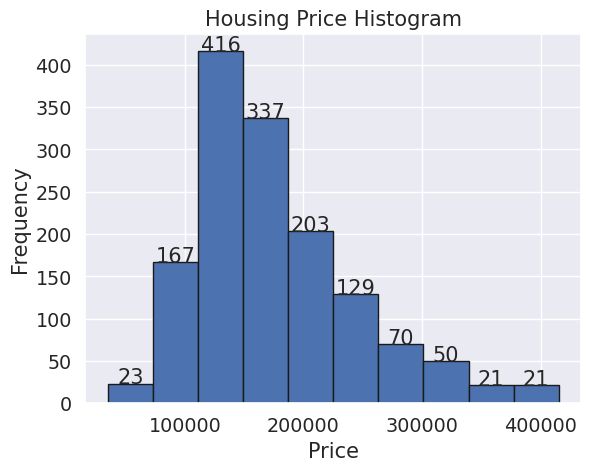

In [ ]:
num_bins = 10

n, bins, patches = plt.hist(df_filtered['SalePrice'], bins=num_bins, edgecolor='k')

plt.title('Housing Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             patches[i].get_height() + 0.1,
             f'{int(n[i])}',
             ha='center')

plt.show()

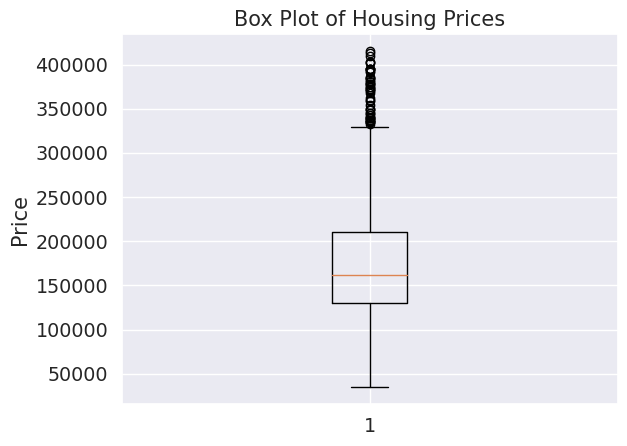

In [ ]:
plt.boxplot(df_filtered['SalePrice'])
plt.title('Box Plot of Housing Prices')
plt.ylabel('Price')
plt.show()

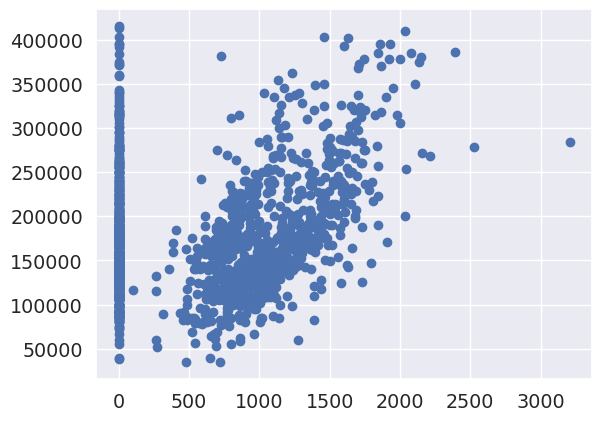

In [ ]:
fig,ax=plt.subplots()
plt.scatter(x=df_filtered['TotalBsmtSF'],y=df_filtered['SalePrice'])

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

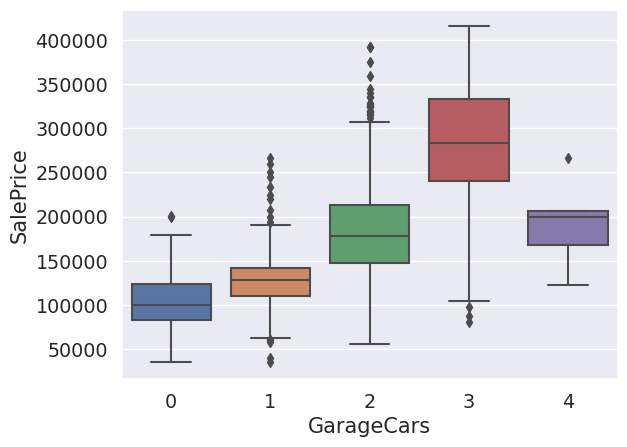

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(x=df_filtered['GarageCars'],y=df_filtered['SalePrice'])

**Multiple Linear Regression Analysis**

In [ ]:
df_filtered['1stFlrSF_centered'] = df_filtered['1stFlrSF']-df_filtered['1stFlrSF'].mean()

X = df_filtered[['OverallQual', 'GarageCars', '1stFlrSF_centered']]
y = df_filtered['SalePricelog']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePricelog   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1421.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:05:23   Log-Likelihood:                 352.56
No. Observations:                1437   AIC:                            -697.1
Df Residuals:                    1433   BIC:                            -676.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9856      0.022    501.353      0.000      10.943      11.029
OverallQual           0.1600      0.005     33.485      0.000       0.151       0.169
GarageCars            0.1222      0.009     14.243      0.000       0.105       0.139
1stFlrSF_centered     0.0002   1.59e-05     15.400      0.000       0.000       0.000
==============================================================================
Omnibus:                      182.936   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.813
Skew:                          -0.663   Prob(JB):                    2.97e-114
Kurtosis:                       5.640   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""